In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Comparing different methods zscore calculations for out.plate5 and out.plate6

* All.count.Zscores.elledge.csv - fixed peptide size
* All.count.Zscores.jake1.csv
* All.count.Zscores.jake117.csv
* All.count.Zscores.jake133.csv
* All.count.Zscores.jake177.csv
* All.count.Zscores.jake300.csv - fixed peptide size
* All.count.Zscores.jakemedian.csv - median of all 'jake' zscores

`All.count.Zscores.elledge.csv` has fewer samples due to some bug/limitation in the script.
Restricting comparison to just those columns.

That bug was likely a driver in creating our own as well as the lack of clarity as to the precise nature of the grouping.

```r
convert_params1 <- virScanR::vs.set_params_convert(stat  = "Z_score",
		makeGroups = TRUE,
		makeGroupSize = 300,
		idCol = "id",
		groupTogetherIfGreaterThanGroupSize = TRUE,   <--- not entiredly certain what this does
		splitHighVarMeanGrps = TRUE,                  <--- not entiredly certain what this does
		cols_to_remove = NULL,
		cols_to_not_evaluate = c("id","input"),
		propExtremesToRemove = 0.04,                  <--- Zscore is computed based on the trimmed mean and stddev (we trimmed 5%)
		removeTail = "both",                          <---
		coresAcrossGroups = parallel::detectCores()-2,
		returnAs = "data.table",
		returnParams = TRUE)

nrowsRemove <- round(nrows * propExtremesToRemove, digits = 0)

    if(removeTail == "both"){
      rowsTrimmed <- c((nrowsRemove+1):(nrows-nrowsRemove))
```

# Read them all

In [2]:
%%time

dirs=['out.plate5','out.plate6']
files=['All.count.Zscores.elledge.csv','All.count.Zscores.jake1.csv','All.count.Zscores.jake117.csv',
       'All.count.Zscores.jake133.csv','All.count.Zscores.jake177.csv','All.count.Zscores.jake300.csv']

zscores={}
for dir in dirs:
    print(dir)
    zscores[dir]={}
    for file in files:
        print(file)
        zscores[dir][file] = pd.read_csv(dir+"/"+file,
            skipinitialspace=True,
            sep=",",index_col=[0])


out.plate5
All.count.Zscores.elledge.csv
All.count.Zscores.jake1.csv
All.count.Zscores.jake117.csv
All.count.Zscores.jake133.csv
All.count.Zscores.jake177.csv
All.count.Zscores.jake300.csv
out.plate6
All.count.Zscores.elledge.csv
All.count.Zscores.jake1.csv
All.count.Zscores.jake117.csv
All.count.Zscores.jake133.csv
All.count.Zscores.jake177.csv
All.count.Zscores.jake300.csv
CPU times: user 15.6 s, sys: 1.54 s, total: 17.1 s
Wall time: 17.1 s


# Keep only columns in the elledge dataframe

In [3]:
zscores['out.plate5']['All.count.Zscores.elledge.csv'].shape

(113824, 60)

In [4]:
113824*60

6829440

In [5]:
%%time

for dir in dirs:
    print(dir)
    elledge_columns = zscores[dir]['All.count.Zscores.elledge.csv'].columns
    print(elledge_columns)
    for file in ['All.count.Zscores.jake1.csv','All.count.Zscores.jake117.csv','All.count.Zscores.jake133.csv',
                 'All.count.Zscores.jake177.csv','All.count.Zscores.jake300.csv']:
        print(file)
        zscores[dir][file] = zscores[dir][file].loc[:,elledge_columns].copy()

out.plate5
Index(['1448401dup', '1448401', '1449301dup', '1449301', '1453601dup',
       '1453601', '1453801dup', '1453801', '1461501dup', '1461501',
       '1468001dup', '1468001', '1473701dup', '1473701', '20066dup', '20066',
       '20078dup', '20078', '20167dup', '20167', '20225dup', '20225',
       '20226dup', '20226', '20248dup', '20248', '20471dup', '20471',
       '21026dup', '21026', '21060dup', '21060', '21092dup', '21092',
       '21129dup', '21129', '21283dup', '21283', '3414dup', '3414', '4033dup',
       '4033', '4148dup', '4148', '4199dup', '4199', '4274dup', '4274',
       '4416dup', '4416', '4418dup', '4418', '4465dup', '4465', '4551dup',
       '4551', 'CSE05dup', 'CSE05', 'PLib05dup', 'PLib05'],
      dtype='object')
All.count.Zscores.jake1.csv
All.count.Zscores.jake117.csv
All.count.Zscores.jake133.csv
All.count.Zscores.jake177.csv
All.count.Zscores.jake300.csv
out.plate6
Index(['1454201dup', '1454201', '1455501dup', '1455501', '1457701dup',
       '1457701', '14654

In [6]:
for dir in dirs:
    print(dir)

    # Stack the dataframes into a 3D array
    stacked = np.array([zscores[dir][f].values for f in [
        'All.count.Zscores.jake1.csv','All.count.Zscores.jake117.csv','All.count.Zscores.jake133.csv',
        'All.count.Zscores.jake177.csv','All.count.Zscores.jake300.csv'] ])

    # Calculate median along axis 0 (across dataframes)
    median_values = np.median(stacked, axis=0)

    # Create new dataframe with same index/columns as original
    zscores[dir]['All.count.Zscores.jakemedian.csv'] = pd.DataFrame(median_values, 
                    index=zscores[dir]['All.count.Zscores.jake1.csv'].index,
                    columns=zscores[dir]['All.count.Zscores.jake1.csv'].columns)

#files = files.append('All.count.Zscores.jakemedian.csv')
files = np.append(files,'All.count.Zscores.jakemedian.csv')


out.plate5
out.plate6


In [7]:
files

array(['All.count.Zscores.elledge.csv', 'All.count.Zscores.jake1.csv',
       'All.count.Zscores.jake117.csv', 'All.count.Zscores.jake133.csv',
       'All.count.Zscores.jake177.csv', 'All.count.Zscores.jake300.csv',
       'All.count.Zscores.jakemedian.csv'], dtype='<U32')

In [8]:
def corrwith(method='pearson',axis='index'):
    for dir in dirs:
        print(dir)
        tmp=pd.DataFrame(columns=files,index=files)
        for file1 in files:
            for file2 in files:
                #print(f"{dir} : {file1} : {file2} : {zscores[dir][file1].corrwith(zscores[dir][file2],method='pearson').median()}")
                tmp.loc[file1,file2] = zscores[dir][file1].corrwith(zscores[dir][file2],method=method,axis=axis).median()
        display(tmp)

# Compute column-wise correlation

In [9]:
%%time

corrwith(method='pearson',axis='index')

out.plate5


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.97442,0.971105,0.970376,0.974268,0.981527,0.980305
All.count.Zscores.jake1.csv,0.97442,1.0,0.991458,0.992104,0.99199,0.990369,0.995942
All.count.Zscores.jake117.csv,0.971105,0.991458,1.0,0.99475,0.991921,0.993398,0.997099
All.count.Zscores.jake133.csv,0.970376,0.992104,0.99475,1.0,0.994136,0.994186,0.99771
All.count.Zscores.jake177.csv,0.974268,0.99199,0.991921,0.994136,1.0,0.993109,0.997061
All.count.Zscores.jake300.csv,0.981527,0.990369,0.993398,0.994186,0.993109,1.0,0.996575
All.count.Zscores.jakemedian.csv,0.980305,0.995942,0.997099,0.99771,0.997061,0.996575,1.0


out.plate6


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.995307,0.994429,0.993795,0.991886,0.997129,0.996331
All.count.Zscores.jake1.csv,0.995307,1.0,0.996306,0.996017,0.994933,0.999203,0.998961
All.count.Zscores.jake117.csv,0.994429,0.996306,1.0,0.994514,0.996147,0.997187,0.998573
All.count.Zscores.jake133.csv,0.993795,0.996017,0.994514,1.0,0.997253,0.995907,0.997435
All.count.Zscores.jake177.csv,0.991886,0.994933,0.996147,0.997253,1.0,0.994847,0.997195
All.count.Zscores.jake300.csv,0.997129,0.999203,0.997187,0.995907,0.994847,1.0,0.999139
All.count.Zscores.jakemedian.csv,0.996331,0.998961,0.998573,0.997435,0.997195,0.999139,1.0


CPU times: user 21 s, sys: 3.57 s, total: 24.5 s
Wall time: 24.6 s


In [10]:
%%time

corrwith(method='kendall',axis='index')

out.plate5


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.907488,0.907135,0.90689,0.904232,0.909018,0.908648
All.count.Zscores.jake1.csv,0.907488,1.0,0.988688,0.982866,0.983105,0.988678,0.992215
All.count.Zscores.jake117.csv,0.907135,0.988688,1.0,0.984629,0.984302,0.987021,0.993387
All.count.Zscores.jake133.csv,0.90689,0.982866,0.984629,1.0,0.98398,0.982892,0.988714
All.count.Zscores.jake177.csv,0.904232,0.983105,0.984302,0.98398,1.0,0.983503,0.988962
All.count.Zscores.jake300.csv,0.909018,0.988678,0.987021,0.982892,0.983503,1.0,0.992119
All.count.Zscores.jakemedian.csv,0.908648,0.992215,0.993387,0.988714,0.988962,0.992119,1.0


out.plate6


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.913886,0.910228,0.907726,0.90253,0.915377,0.915229
All.count.Zscores.jake1.csv,0.913886,1.0,0.976409,0.961823,0.959882,0.996735,0.991637
All.count.Zscores.jake117.csv,0.910228,0.976409,1.0,0.959331,0.969127,0.975419,0.983691
All.count.Zscores.jake133.csv,0.907726,0.961823,0.959331,1.0,0.963597,0.962234,0.967649
All.count.Zscores.jake177.csv,0.90253,0.959882,0.969127,0.963597,1.0,0.960819,0.967778
All.count.Zscores.jake300.csv,0.915377,0.996735,0.975419,0.962234,0.960819,1.0,0.991275
All.count.Zscores.jakemedian.csv,0.915229,0.991637,0.983691,0.967649,0.967778,0.991275,1.0


CPU times: user 1min, sys: 13.7 s, total: 1min 14s
Wall time: 1min 15s


In [11]:
%%time

corrwith(method='spearman',axis='index')

out.plate5


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.962724,0.962619,0.962231,0.961642,0.963807,0.963169
All.count.Zscores.jake1.csv,0.962724,1.0,0.997282,0.995909,0.996181,0.996979,0.998366
All.count.Zscores.jake117.csv,0.962619,0.997282,1.0,0.996622,0.996433,0.996898,0.998636
All.count.Zscores.jake133.csv,0.962231,0.995909,0.996622,1.0,0.996732,0.995873,0.997725
All.count.Zscores.jake177.csv,0.961642,0.996181,0.996433,0.996732,1.0,0.996287,0.997742
All.count.Zscores.jake300.csv,0.963807,0.996979,0.996898,0.995873,0.996287,1.0,0.998331
All.count.Zscores.jakemedian.csv,0.963169,0.998366,0.998636,0.997725,0.997742,0.998331,1.0


out.plate6


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.96879,0.96845,0.967365,0.966826,0.968904,0.968943
All.count.Zscores.jake1.csv,0.96879,1.0,0.995579,0.992081,0.991651,0.999466,0.99872
All.count.Zscores.jake117.csv,0.96845,0.995579,1.0,0.991445,0.993659,0.995327,0.997217
All.count.Zscores.jake133.csv,0.967365,0.992081,0.991445,1.0,0.99259,0.99209,0.993853
All.count.Zscores.jake177.csv,0.966826,0.991651,0.993659,0.99259,1.0,0.992094,0.993792
All.count.Zscores.jake300.csv,0.968904,0.999466,0.995327,0.99209,0.992094,1.0,0.998569
All.count.Zscores.jakemedian.csv,0.968943,0.99872,0.997217,0.993853,0.993792,0.998569,1.0


CPU times: user 1min 49s, sys: 22.2 s, total: 2min 11s
Wall time: 2min 12s


# Compute row-wise correlation

In [12]:
%%time

corrwith(method='pearson',axis='columns')

out.plate5


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.996777,0.996745,0.996663,0.996561,0.996836,0.996771
All.count.Zscores.jake1.csv,0.996777,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake117.csv,0.996745,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake133.csv,0.996663,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake177.csv,0.996561,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake300.csv,0.996836,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jakemedian.csv,0.996771,1.0,1.0,1.0,1.0,1.0,1.0


out.plate6


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.99581,0.995516,0.995045,0.994832,0.995859,0.995724
All.count.Zscores.jake1.csv,0.99581,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake117.csv,0.995516,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake133.csv,0.995045,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake177.csv,0.994832,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake300.csv,0.995859,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jakemedian.csv,0.995724,1.0,1.0,1.0,1.0,1.0,1.0


CPU times: user 32.3 s, sys: 4.67 s, total: 36.9 s
Wall time: 37.1 s


In [13]:
%%time

corrwith(method='kendall',axis='columns') # This takes quite a while compared to the others. About an hour.

out.plate5


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.898305,0.898305,0.898305,0.897175,0.898305,0.898305
All.count.Zscores.jake1.csv,0.898305,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake117.csv,0.898305,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake133.csv,0.898305,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake177.csv,0.897175,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake300.csv,0.898305,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jakemedian.csv,0.898305,1.0,1.0,1.0,1.0,1.0,1.0


out.plate6


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.920904,0.919774,0.917514,0.916384,0.922034,0.920904
All.count.Zscores.jake1.csv,0.920904,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake117.csv,0.919774,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake133.csv,0.917514,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake177.csv,0.916384,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake300.csv,0.922034,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jakemedian.csv,0.920904,1.0,1.0,1.0,1.0,1.0,1.0


CPU times: user 55min 28s, sys: 5.54 s, total: 55min 33s
Wall time: 55min 38s


In [14]:
%%time

corrwith(method='spearman',axis='columns')

out.plate5


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.955265,0.955154,0.955043,0.954765,0.955432,0.955321
All.count.Zscores.jake1.csv,0.955265,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake117.csv,0.955154,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake133.csv,0.955043,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake177.csv,0.954765,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake300.csv,0.955432,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jakemedian.csv,0.955321,1.0,1.0,1.0,1.0,1.0,1.0


out.plate6


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.973548,0.973326,0.972437,0.971937,0.973659,0.973715
All.count.Zscores.jake1.csv,0.973548,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake117.csv,0.973326,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake133.csv,0.972437,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake177.csv,0.971937,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jake300.csv,0.973659,1.0,1.0,1.0,1.0,1.0,1.0
All.count.Zscores.jakemedian.csv,0.973715,1.0,1.0,1.0,1.0,1.0,1.0


CPU times: user 1h 4min 6s, sys: 3.3 s, total: 1h 4min 10s
Wall time: 1h 4min 13s


In [15]:
zscores['out.plate5']['All.count.Zscores.jake1.csv'].compare(zscores['out.plate5']['All.count.Zscores.elledge.csv'])

1448401dup             1448401           1449301dup             1449301  \
            self     other      self     other       self     other      self   
id                                                                              
1      -0.242736 -0.239266 -0.181620 -0.201389  -0.231087 -0.221524 -0.209498   
10     -0.242736 -0.239266 -0.181620 -0.201389  -0.231087  1.655370 -0.209498   
100    -0.447984 -0.440814 -0.372266 -0.367026  -0.379830 -0.376812 -0.385809   
1000   -0.478979 -0.469147 -0.395000 -0.391064  -0.418034 -0.412792 -0.427342   
10000  -0.495596 -0.482641 -0.405192 -0.396730  -0.421677 -0.413127 -0.429964   
...          ...       ...       ...       ...        ...       ...       ...   
9995   -0.242736 -0.239266 -0.181620 -0.201389  -0.231087 -0.221524 -0.209498   
9996   -0.242736 -0.239266 -0.181620 -0.201389  -0.231087 -0.221524 -0.209498   
9997   -0.447984 -0.440814 -0.372266 -0.367026  -0.379830 -0.376812 -0.385809   
9998   -0.528485 -0.514935  0.701380  0.562175  -0.436584 -0.429833 -0.465563   
9999   -0.242736 -0.239266 -0.181620 -0.201389  -0.231087 -0.221524 -0.209498   

                1453601dup            ...      4551            CSE05dup  \
          other       self     other  ...      self     other      self   
id                                    ...                                 
1     -0.197725  -0.527780 -0.518163  ... -0.364712 -0.364992 -0.314617   
10    -0.197725   0.839128  0.716326  ... -0.364712 -0.364992 -0.314617   
100   -0.235352  -0.272438 -0.285260  ... -0.648180 -0.630379 -0.556787   
1000  -0.425667  -0.852215 -0.820813  ... -0.706524 -0.676888 -0.579631   
10000 -0.424431  -0.537182 -0.525723  ... -0.696350 -0.446752 -0.583153   
...         ...        ...       ...  ...       ...       ...       ...   
9995  -0.197725  -0.527780 -0.518163  ... -0.364712 -0.364992 -0.314617   
9996  -0.197725  -0.527780 -0.518163  ... -0.364712 -0.364992 -0.314617   
9997  -0.383794  -0.801624 -0.773532  ... -0.648180 -0.630379 -0.556787   
9998  -0.458218  -0.843525 -0.692566  ... -0.689997 -0.660027  6.422949   
9999  -0.197725  -0.527780  0.099081  ... -0.364712 -0.364992 -0.314617   

                    CSE05           PLib05dup              PLib05            
          other      self     other      self     other      self     other  
id                                                                           
1     -0.314006 -0.372631 -0.371039 -0.876326 -0.628462 -0.881871 -0.851729  
10    -0.314006  3.245089  2.725706 -0.175939 -0.194913 -0.110895 -0.134102  
100   -0.403145 -0.609917 -0.586350 -0.048110 -0.074310 -0.113244 -0.134660  
1000  -0.561314 -0.648557 -0.615774 -0.708934 -0.694061 -0.718888 -0.702991  
10000 -0.563742 -0.616018 -0.585583 -1.161916 -1.052735 -1.005464 -0.970509  
...         ...       ...       ...       ...       ...       ...       ...  
9995  -0.314006 -0.372631 -0.371039 -0.876326 -0.628462 -0.367887 -0.373311  
9996  -0.314006 -0.372631 -0.371039 -0.876326 -0.845236 -0.881871 -0.612520  
9997  -0.542355 -0.609917 -0.496292 -1.007408 -0.966143 -0.765307 -0.741601  
9998   5.696195  0.833106  0.697228 -0.692823 -0.675122  0.086280  0.050358  
9999  -0.314006 -0.372631 -0.371039 -0.175939 -0.194913 -0.367887 -0.373311  

[113824 rows x 120 columns]

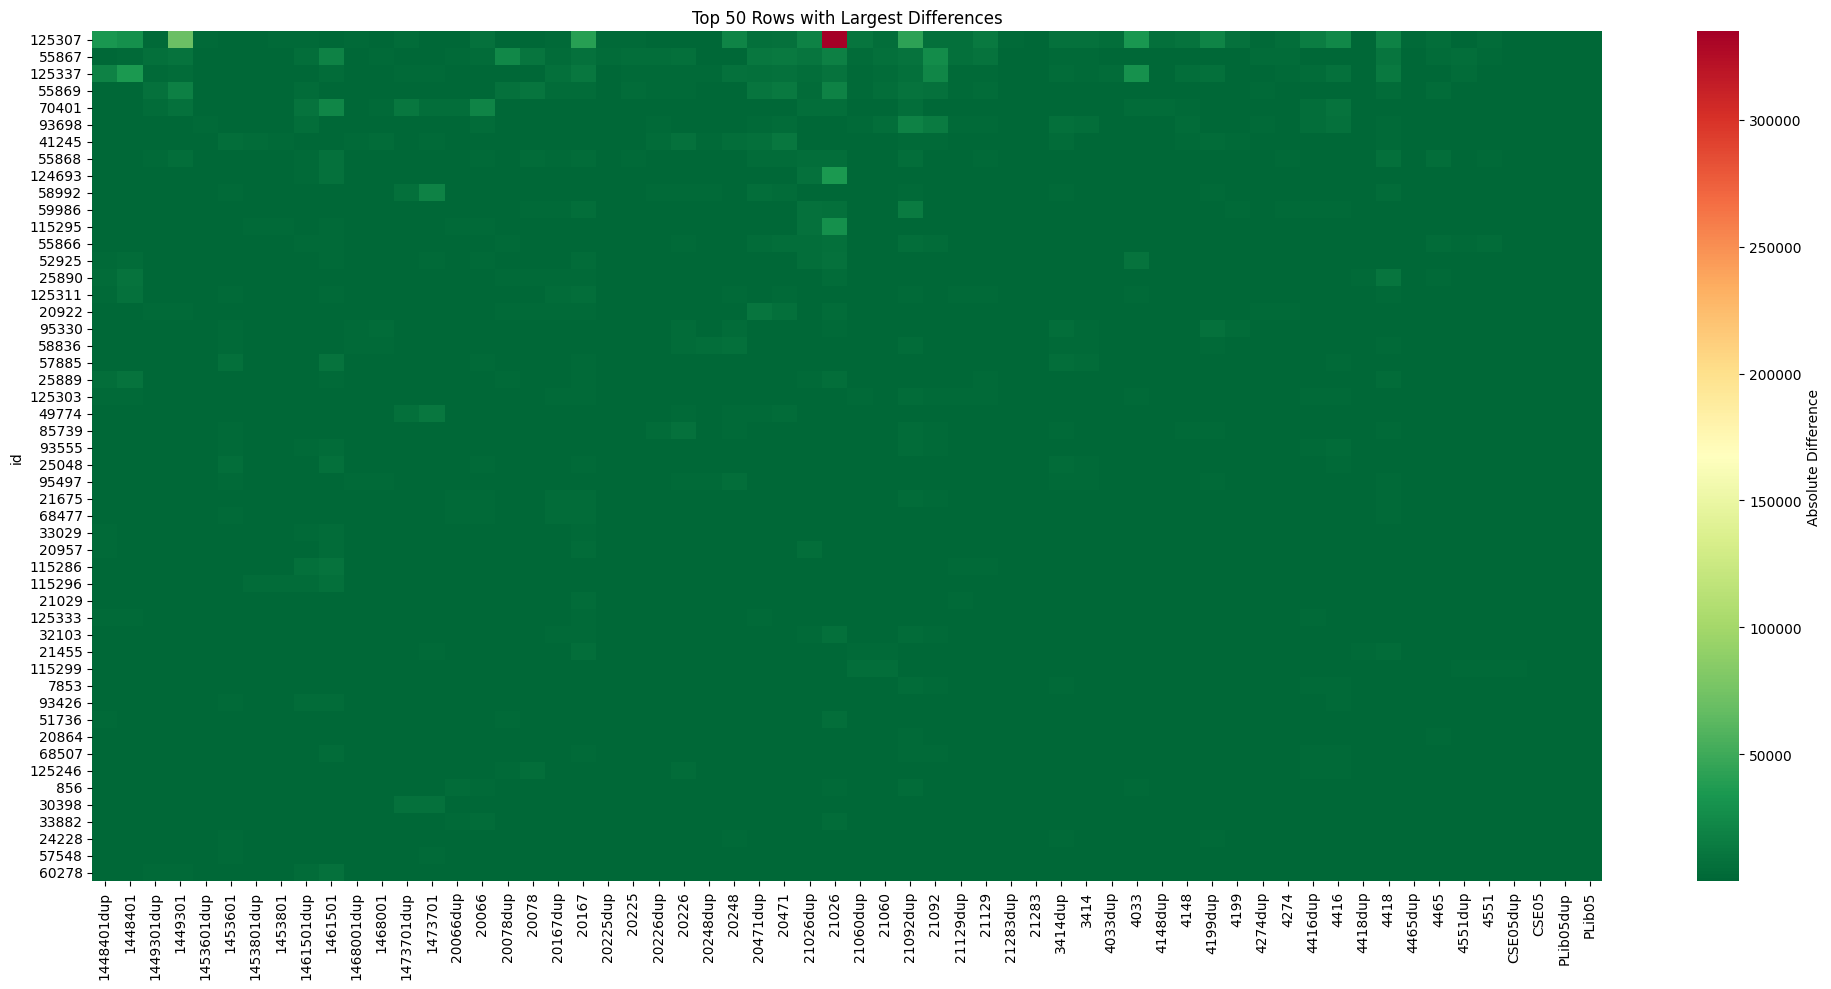

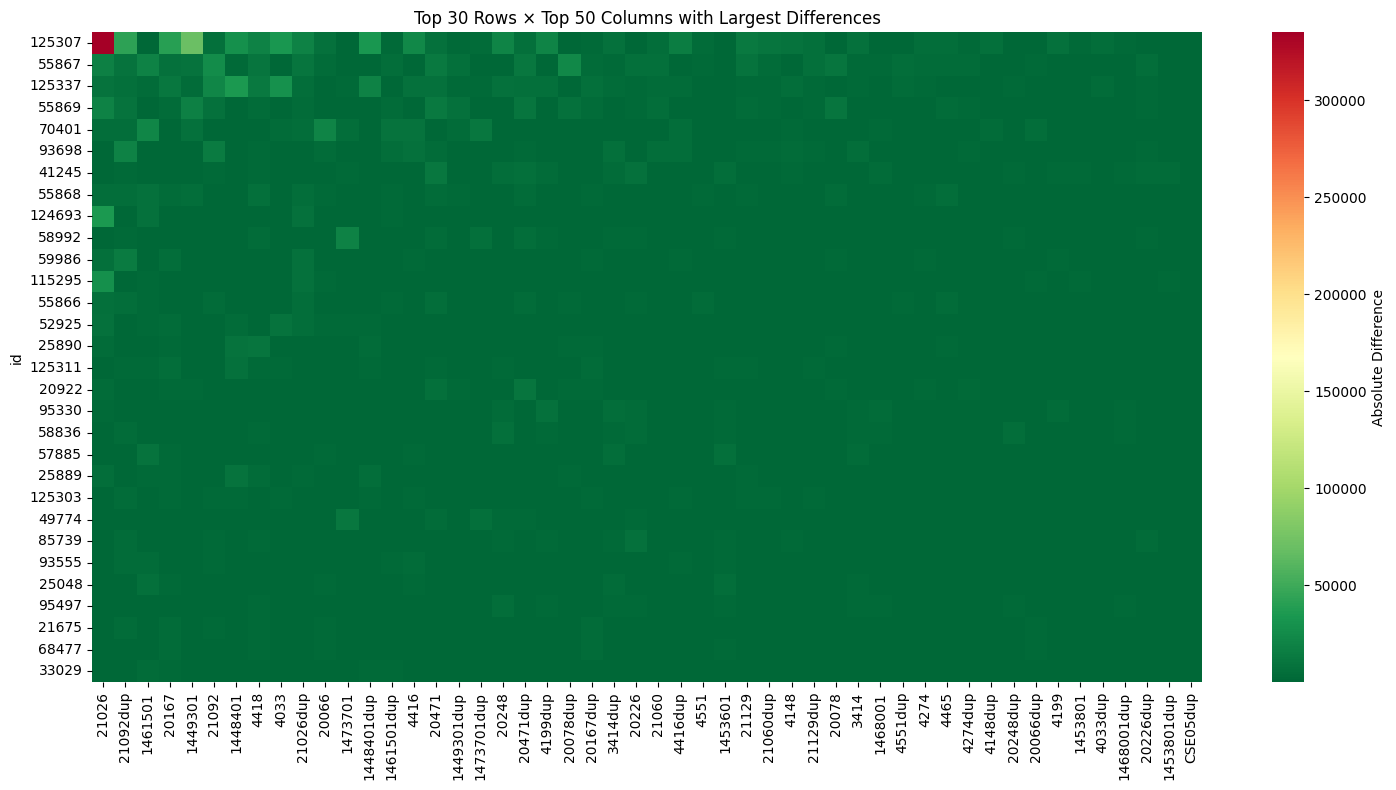

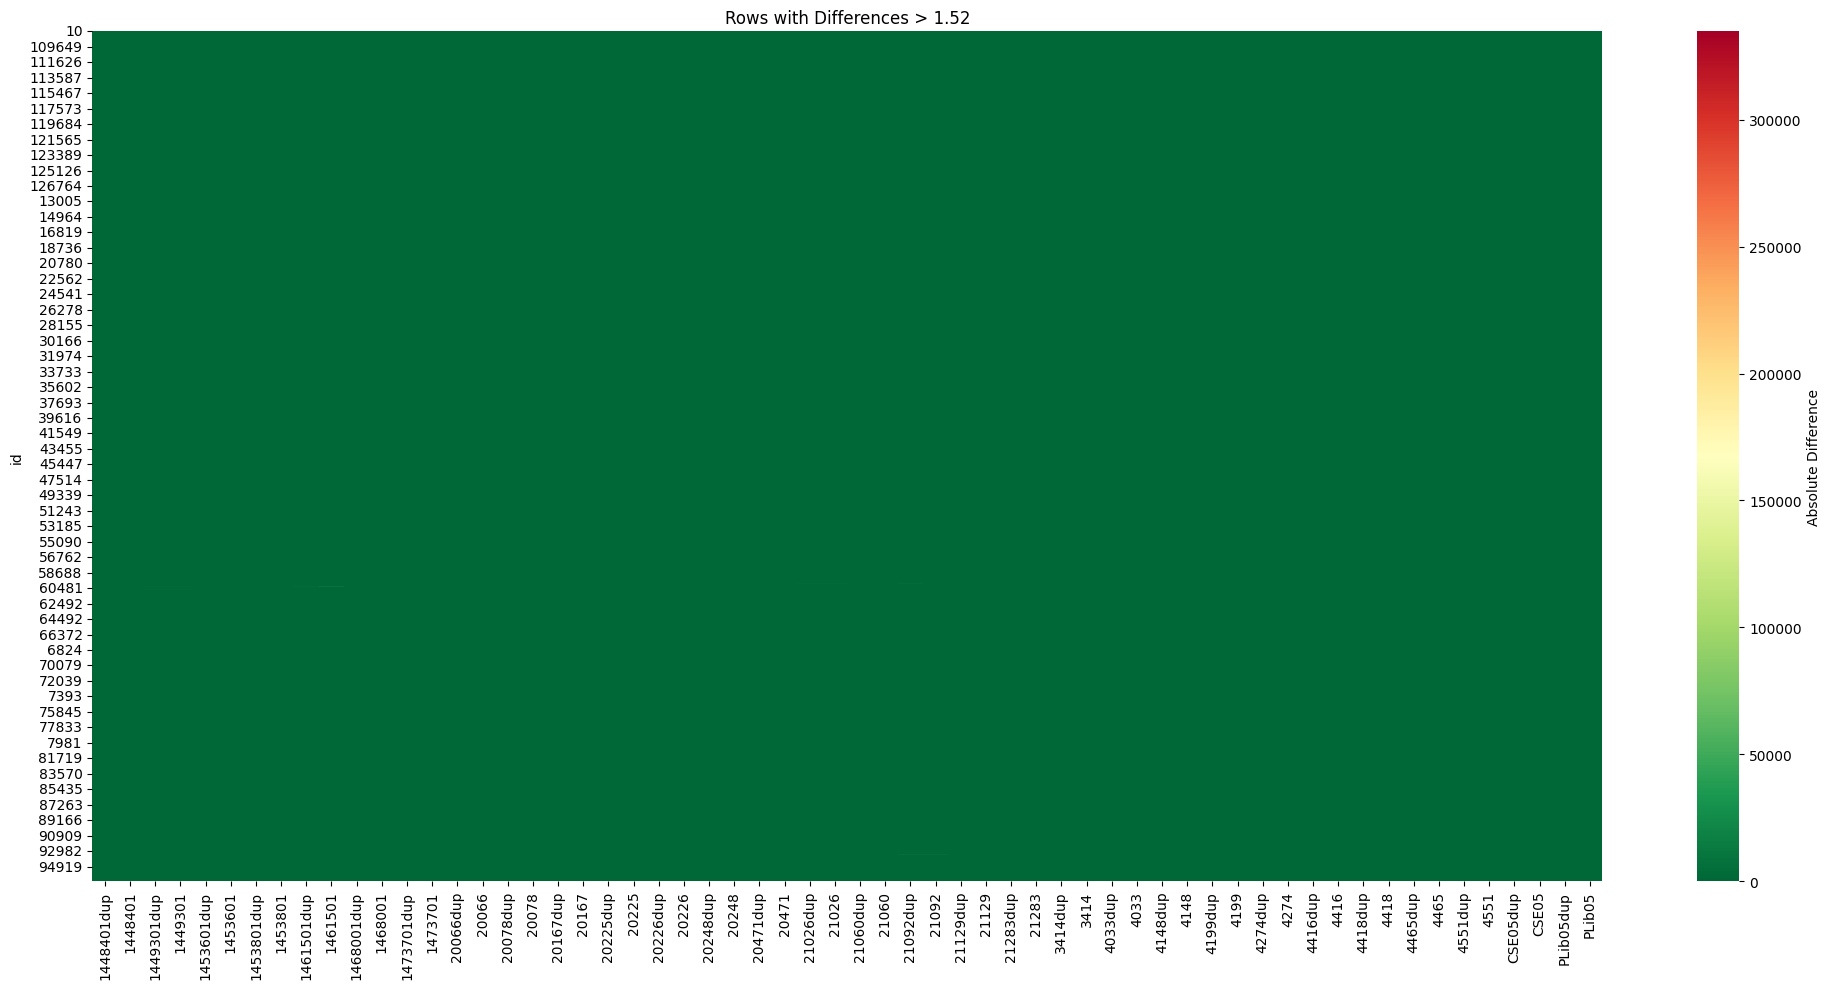

CPU times: user 3.68 s, sys: 146 ms, total: 3.83 s
Wall time: 3.83 s


In [16]:
%%time

# Assuming you have df1 and df2
# Calculate the absolute differences
diff = (zscores['out.plate5']['All.count.Zscores.jake1.csv'] - zscores['out.plate5']['All.count.Zscores.elledge.csv']).abs()

# Strategy 1: Show top N rows with largest differences
n_rows = 50  # Number of rows to show
row_diff_sum = diff.sum(axis=1)
top_diff_rows = row_diff_sum.nlargest(n_rows).index
subset_diff = diff.loc[top_diff_rows]

# Create heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(subset_diff, cmap='RdYlGn_r', cbar_kws={'label': 'Absolute Difference'})
plt.title(f'Top {n_rows} Rows with Largest Differences')
plt.tight_layout()
plt.show()

# Strategy 2: Show both top rows AND top columns
n_rows = 30
n_cols = 50
row_diff_sum = diff.sum(axis=1)
col_diff_sum = diff.sum(axis=0)
top_rows = row_diff_sum.nlargest(n_rows).index
top_cols = col_diff_sum.nlargest(n_cols).index
subset_diff = diff.loc[top_rows, top_cols]

plt.figure(figsize=(15, 8))
sns.heatmap(subset_diff, cmap='RdYlGn_r', cbar_kws={'label': 'Absolute Difference'})
plt.title(f'Top {n_rows} Rows × Top {n_cols} Columns with Largest Differences')
plt.tight_layout()
plt.show()

# Strategy 3: Filter by threshold
threshold = diff.quantile(0.95).quantile(0.95)  # 95th percentile
mask = (diff > threshold).any(axis=1)
filtered_diff = diff[mask]

plt.figure(figsize=(20, 10))
sns.heatmap(filtered_diff, cmap='RdYlGn_r', cbar_kws={'label': 'Absolute Difference'})
plt.title(f'Rows with Differences > {threshold:.2f}')
plt.tight_layout()
plt.show()

In [17]:
# Get overview of differences
print(f"Max difference: {diff.max().max()}")
print(f"Mean difference: {diff.mean().mean()}")
print(f"Rows with any difference: {(diff > 0).any(axis=1).sum()}")

Max difference: 334907.76904034725
Mean difference: 0.8904635692187947
Rows with any difference: 113824


In [18]:
np.sort(diff.values.flatten())[::-1][0:100]

array([334907.76904035,  70455.77222282,  43049.61465081,  40142.14181707,
        35123.74468089,  34727.70545402,  33709.03163967,  33088.64164834,
        29219.01769269,  28388.6237926 ,  27569.97550529,  25210.83353209,
        23434.82610502,  22346.24996786,  22122.47759052,  21807.86876666,
        20363.9759311 ,  20128.66263964,  19786.90155278,  19336.17452528,
        18963.81995061,  18903.1545204 ,  18690.41260287,  18532.14286678,
        18401.66245878,  18355.66991083,  18081.20202671,  17420.63883893,
        15312.18781343,  14198.72858277,  14185.46648549,  12629.98125737,
        12331.9637844 ,  11796.42984223,  11780.04324803,  11285.57006091,
        11200.86772586,  11125.33719996,  10737.87363028,  10732.59104872,
        10396.69837542,  10084.52953657,   9979.03141495,   9494.07950578,
         9430.33709425,   9328.7697257 ,   9317.8817629 ,   9225.1727851 ,
         9043.21935572,   8977.08064087,   8796.04661564,   8562.15674321,
         8561.52976939,  

In [19]:
zscores['out.plate5']['All.count.Zscores.jake1.csv'].loc[125307,'21026']

np.float64(71459.36186277673)

In [20]:
zscores['out.plate5']['All.count.Zscores.elledge.csv'].loc[125307,'21026']

np.float64(406367.130903124)

In [21]:
diff.max()


1448401dup     33709.031640
1448401        35123.744681
1449301dup      7590.764635
1449301        70455.772223
1453601dup      2351.133034
1453601         5745.951639
1453801dup      3918.350498
1453801         3438.837027
1461501dup      8367.164970
1461501        21807.868767
1468001dup      2405.008262
1468001         2932.483493
1473701dup     10732.591049
1473701        19336.174525
20066dup        4453.086160
20066          20363.975931
20078dup       22346.249968
20078           9317.881763
20167dup        5826.473064
20167          40142.141817
20225dup        3478.785217
20225           5037.903884
20226dup        4736.948609
20226           7849.218789
20248dup        4591.335627
20248          19786.901553
20471dup       11200.867726
20471          12629.981257
21026dup       18903.154520
21026         334907.769040
21060dup       10396.698375
21060           6224.257151
21092dup       43049.614651
21092          25210.833532
21129dup        6506.470265
21129          11796

In [22]:
%%time

df1 = zscores['out.plate5']['All.count.Zscores.jake1.csv'].copy()
df2 = zscores['out.plate5']['All.count.Zscores.elledge.csv'].copy()

# Calculate absolute differences
diff = (df1 - df2).abs()

# Flatten the dataframe and get top 10 values
diff_flat = diff.stack()
top_10 = diff_flat.nlargest(25)

#for (row_idx, col_idx), diff_value in top_10.items():
#    df1_value = df1.loc[row_idx, col_idx]
#    df2_value = df2.loc[row_idx, col_idx]

# Or as a DataFrame for easier viewing
results = pd.DataFrame({
    'Peptide': [idx[0] for idx in top_10.index],
    'Sample': [idx[1] for idx in top_10.index],
    'Difference': top_10.values,
    'df1_value': [df1.loc[idx[0], idx[1]] for idx in top_10.index],
    'df2_value': [df2.loc[idx[0], idx[1]] for idx in top_10.index]
})

print("\nTop 25 Differences (Table):")
print(results.to_string(index=False))


Top 25 Differences (Table):
 Peptide     Sample    Difference     df1_value     df2_value
  125307      21026 334907.769040  71459.361863 406367.130903
  125307    1449301  70455.772223  86094.074262  15638.302039
  125307   21092dup  43049.614651  78654.804518 121704.419169
  125307      20167  40142.141817  47115.445223  87257.587040
  125337    1448401  35123.744681  52380.997234  17257.252553
  124693      21026  34727.705454  39814.432516   5086.727062
  125307 1448401dup  33709.031640  68071.327457  34362.295818
  125307       4033  33088.641648  59425.819827  26337.178179
  125337       4033  29219.017693  45020.686982  15801.669290
  115295      21026  28388.623793  32546.812006   4158.188213
  125307    1448401  27569.975505 121679.114488  94109.138983
   55867      21092  25210.833532  36592.533682  11381.700150
  125307       4416  23434.826105  35873.399647  12438.573542
   55867   20078dup  22346.249968  45036.018937  22689.768969
  125337      21092  22122.477591  32109.

In [23]:
%%time

df1 = (zscores['out.plate5']['All.count.Zscores.jake1.csv'] > 5).astype(int)
df2 = (zscores['out.plate5']['All.count.Zscores.elledge.csv'] > 5).astype(int)
diff = (df1 - df2).abs()
diff.sum()

CPU times: user 46.3 ms, sys: 13.1 ms, total: 59.4 ms
Wall time: 58.1 ms


1448401dup     899
1448401        617
1449301dup    1007
1449301       1006
1453601dup     393
1453601        844
1453801dup     668
1453801        604
1461501dup     978
1461501        528
1468001dup     648
1468001        695
1473701dup    1068
1473701       1053
20066dup       882
20066          953
20078dup       982
20078          819
20167dup       856
20167          614
20225dup       430
20225          513
20226dup       584
20226          697
20248dup       756
20248          856
20471dup       973
20471          377
21026dup      1019
21026          582
21060dup       816
21060          860
21092dup       539
21092          668
21129dup       872
21129          711
21283dup       763
21283          719
3414dup        772
3414           813
4033dup        760
4033           920
4148dup       1004
4148           778
4199dup        961
4199           628
4274dup        357
4274           682
4416dup        742
4416           868
4418dup        603
4418          1893
4465dup     

In [24]:
df2.sum()

1448401dup    5068
1448401       5179
1449301dup    5317
1449301       5095
1453601dup    3951
1453601       4101
1453801dup    4240
1453801       4423
1461501dup    5172
1461501       5186
1468001dup    4012
1468001       4088
1473701dup    5282
1473701       5194
20066dup      4622
20066         5207
20078dup      4765
20078         4353
20167dup      4923
20167         5015
20225dup      3378
20225         3592
20226dup      4330
20226         4285
20248dup      4800
20248         4727
20471dup      4233
20471         4574
21026dup      5326
21026         5380
21060dup      4265
21060         4372
21092dup      5470
21092         5315
21129dup      4541
21129         4806
21283dup      4083
21283         3953
3414dup       4255
3414          4625
4033dup       4945
4033          5190
4148dup       4400
4148          4782
4199dup       4723
4199          4464
4274dup       4050
4274          3889
4416dup       4917
4416          5265
4418dup       4499
4418          6305
4465dup     

In [25]:
%%time

df1 = zscores['out.plate5']['All.count.Zscores.jake1.csv'].copy()
df2 = zscores['out.plate5']['All.count.Zscores.elledge.csv'].copy()

# Apply threshold of 5 to both dataframes
df1_thresh = df1.abs() > 5
df2_thresh = df2.abs() > 5

# Count differences (where one is above threshold and other isn't, or both differ)
differences = df1_thresh != df2_thresh
num_differences = differences.sum().sum()

print(f"Total number of differences: {num_differences}")

# Breakdown by type
both_above = (df1_thresh & df2_thresh).sum().sum()
both_below = (~df1_thresh & ~df2_thresh).sum().sum()
df1_only = (df1_thresh & ~df2_thresh).sum().sum()
df2_only = (~df1_thresh & df2_thresh).sum().sum()

print(f"\nBreakdown:")
print(f"Both above threshold: {both_above}")
print(f"Both below threshold: {both_below}")
print(f"Only df1 above threshold: {df1_only}")
print(f"Only df2 above threshold: {df2_only}")
print(f"Different threshold status: {df1_only + df2_only}")

# Per column differences
col_differences = differences.sum()
print(f"\nColumns with most differences:")
print(col_differences.nlargest(10))

# Per row differences
row_differences = differences.sum(axis=1)
print(f"\nRows with most differences:")
print(row_differences.nlargest(10))

Total number of differences: 45470

Breakdown:
Both above threshold: 275194
Both below threshold: 6508776
Only df1 above threshold: 43792
Only df2 above threshold: 1678
Different threshold status: 45470

Columns with most differences:
4418          1893
1473701dup    1068
1473701       1053
21026dup      1019
1449301dup    1007
1449301       1006
4148dup       1004
20078dup       982
1461501dup     978
20471dup       973
dtype: int64

Rows with most differences:
id
38271     20
56317     17
127131    16
128092    16
125507    14
77437     13
127778    12
30398     12
32214     12
54123     11
dtype: int64
CPU times: user 109 ms, sys: 25.6 ms, total: 135 ms
Wall time: 132 ms


In [26]:
def count_diffs_at_threshold(threshold=3.5):
    for dir in dirs:
        tmp=pd.DataFrame(columns=files,index=files)
        for file1 in files:
            for file2 in files:
                #tmp.loc[file1,file2] = zscores[dir][file1].corrwith(zscores[dir][file2],method='spearman').median()
                # Apply threshold of 5 to both dataframes
                df1_thresh = zscores[dir][file1].abs() > threshold
                df2_thresh = zscores[dir][file2].abs() > threshold
    
                # Count differences (where one is above threshold and other isn't, or both differ)
                differences = df1_thresh != df2_thresh
                tmp.loc[file1,file2] = differences.sum().sum()
        display(tmp)

In [27]:
%%time

count_diffs_at_threshold(threshold=3.5)

,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,58374,58107,58492,58694,58034,57926
All.count.Zscores.jake1.csv,58374,0,3243,4570,4316,3182,2040
All.count.Zscores.jake117.csv,58107,3243,0,4085,3873,3333,1741
All.count.Zscores.jake133.csv,58492,4570,4085,0,4328,4522,2916
All.count.Zscores.jake177.csv,58694,4316,3873,4328,0,4738,2850
All.count.Zscores.jake300.csv,58034,3182,3333,4522,4738,0,2306
All.count.Zscores.jakemedian.csv,57926,2040,1741,2916,2850,2306,0


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,62039,62903,64044,65136,61980,62021
All.count.Zscores.jake1.csv,62039,0,7154,12079,13055,965,2910
All.count.Zscores.jake117.csv,62903,7154,0,12271,10109,7021,4358
All.count.Zscores.jake133.csv,64044,12079,12271,0,10730,12092,9351
All.count.Zscores.jake177.csv,65136,13055,10109,10730,0,12936,10265
All.count.Zscores.jake300.csv,61980,965,7021,12092,12936,0,2853
All.count.Zscores.jakemedian.csv,62021,2910,4358,9351,10265,2853,0


CPU times: user 2.95 s, sys: 545 ms, total: 3.49 s
Wall time: 3.49 s


In [28]:
%%time

count_diffs_at_threshold(threshold=5)

,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,45470,45394,45677,45787,45329,45219
All.count.Zscores.jake1.csv,45470,0,2284,3295,3047,2351,1533
All.count.Zscores.jake117.csv,45394,2284,0,2885,2763,2429,1237
All.count.Zscores.jake133.csv,45677,3295,2885,0,3012,3204,2032
All.count.Zscores.jake177.csv,45787,3047,2763,3012,0,3352,1978
All.count.Zscores.jake300.csv,45329,2351,2429,3204,3352,0,1694
All.count.Zscores.jakemedian.csv,45219,1533,1237,2032,1978,1694,0


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,48443,49041,49992,50699,48390,48377
All.count.Zscores.jake1.csv,48443,0,5412,8965,9484,681,2156
All.count.Zscores.jake117.csv,49041,5412,0,9123,7386,5367,3370
All.count.Zscores.jake133.csv,49992,8965,9123,0,8031,8974,6961
All.count.Zscores.jake177.csv,50699,9484,7386,8031,0,9367,7412
All.count.Zscores.jake300.csv,48390,681,5367,8974,9367,0,2099
All.count.Zscores.jakemedian.csv,48377,2156,3370,6961,7412,2099,0


CPU times: user 2.95 s, sys: 603 ms, total: 3.55 s
Wall time: 3.55 s


In [29]:
%%time

count_diffs_at_threshold(threshold=10)

,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,24215,24141,24345,24390,24150,24113
All.count.Zscores.jake1.csv,24215,0,1000,1424,1273,1159,664
All.count.Zscores.jake117.csv,24141,1000,0,1242,1201,1153,564
All.count.Zscores.jake133.csv,24345,1424,1242,0,1315,1411,862
All.count.Zscores.jake177.csv,24390,1273,1201,1315,0,1492,839
All.count.Zscores.jake300.csv,24150,1159,1153,1411,1492,0,827
All.count.Zscores.jakemedian.csv,24113,664,564,862,839,827,0


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,29234,29472,29836,30418,29203,29191
All.count.Zscores.jake1.csv,29234,0,2382,3948,4406,311,953
All.count.Zscores.jake117.csv,29472,2382,0,4046,3382,2345,1459
All.count.Zscores.jake133.csv,29836,3948,4046,0,3620,3949,3041
All.count.Zscores.jake177.csv,30418,4406,3382,3620,0,4403,3487
All.count.Zscores.jake300.csv,29203,311,2345,3949,4403,0,958
All.count.Zscores.jakemedian.csv,29191,953,1459,3041,3487,958,0


CPU times: user 2.88 s, sys: 543 ms, total: 3.42 s
Wall time: 3.42 s


In [30]:
%%time

count_diffs_at_threshold(threshold=15)

,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,16744,16679,16770,16814,16624,16657
All.count.Zscores.jake1.csv,16744,0,625,804,754,690,389
All.count.Zscores.jake117.csv,16679,625,0,699,699,711,340
All.count.Zscores.jake133.csv,16770,804,699,0,762,884,501
All.count.Zscores.jake177.csv,16814,754,699,762,0,886,481
All.count.Zscores.jake300.csv,16624,690,711,884,886,0,515
All.count.Zscores.jakemedian.csv,16657,389,340,501,481,515,0


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,20879,21056,21265,21678,20852,20845
All.count.Zscores.jake1.csv,20879,0,1405,2302,2761,181,554
All.count.Zscores.jake117.csv,21056,1405,0,2383,2174,1398,879
All.count.Zscores.jake133.csv,21265,2302,2383,0,2229,2317,1784
All.count.Zscores.jake177.csv,21678,2761,2174,2229,0,2756,2235
All.count.Zscores.jake300.csv,20852,181,1398,2317,2756,0,559
All.count.Zscores.jakemedian.csv,20845,554,879,1784,2235,559,0


CPU times: user 2.94 s, sys: 572 ms, total: 3.51 s
Wall time: 3.51 s


In [31]:
%%time

count_diffs_at_threshold(threshold=20)

,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,12622,12558,12630,12635,12526,12536
All.count.Zscores.jake1.csv,12622,0,444,622,587,496,294
All.count.Zscores.jake117.csv,12558,444,0,540,527,494,230
All.count.Zscores.jake133.csv,12630,622,540,0,587,638,394
All.count.Zscores.jake177.csv,12635,587,527,587,0,669,375
All.count.Zscores.jake300.csv,12526,496,494,638,669,0,362
All.count.Zscores.jakemedian.csv,12536,294,230,394,375,362,0


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,16312,16432,16593,16973,16304,16275
All.count.Zscores.jake1.csv,16312,0,996,1733,2085,126,403
All.count.Zscores.jake117.csv,16432,996,0,1779,1633,984,605
All.count.Zscores.jake133.csv,16593,1733,1779,0,1692,1753,1364
All.count.Zscores.jake177.csv,16973,2085,1633,1692,0,2089,1698
All.count.Zscores.jake300.csv,16304,126,984,1753,2089,0,407
All.count.Zscores.jakemedian.csv,16275,403,605,1364,1698,407,0


CPU times: user 2.94 s, sys: 575 ms, total: 3.52 s
Wall time: 3.52 s


In [32]:
%%time

count_diffs_at_threshold(threshold=25)

,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,10729,10693,10732,10745,10615,10652
All.count.Zscores.jake1.csv,10729,0,404,487,472,390,215
All.count.Zscores.jake117.csv,10693,404,0,453,426,446,223
All.count.Zscores.jake133.csv,10732,487,453,0,509,535,316
All.count.Zscores.jake177.csv,10745,472,426,509,0,590,317
All.count.Zscores.jake300.csv,10615,390,446,535,590,0,315
All.count.Zscores.jakemedian.csv,10652,215,223,316,317,315,0


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,14066,14198,14367,14740,14066,14048
All.count.Zscores.jake1.csv,14066,0,796,1383,1746,96,272
All.count.Zscores.jake117.csv,14198,796,0,1481,1430,794,540
All.count.Zscores.jake133.csv,14367,1383,1481,0,1477,1381,1133
All.count.Zscores.jake177.csv,14740,1746,1430,1477,0,1742,1480
All.count.Zscores.jake300.csv,14066,96,794,1381,1742,0,274
All.count.Zscores.jakemedian.csv,14048,272,540,1133,1480,274,0


CPU times: user 2.94 s, sys: 627 ms, total: 3.56 s
Wall time: 3.56 s


In [33]:
%%time

count_diffs_at_threshold(threshold=50)

,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,5996,5975,6027,6041,5943,5980
All.count.Zscores.jake1.csv,5996,0,245,379,297,245,150
All.count.Zscores.jake117.csv,5975,245,0,308,262,266,113
All.count.Zscores.jake133.csv,6027,379,308,0,334,398,261
All.count.Zscores.jake177.csv,6041,297,262,334,0,354,187
All.count.Zscores.jake300.csv,5943,245,266,398,354,0,199
All.count.Zscores.jakemedian.csv,5980,150,113,261,187,199,0


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,0,8199,8310,8400,8662,8195,8190
All.count.Zscores.jake1.csv,8199,0,417,807,1075,40,137
All.count.Zscores.jake117.csv,8310,417,0,886,860,425,286
All.count.Zscores.jake133.csv,8400,807,886,0,862,797,678
All.count.Zscores.jake177.csv,8662,1075,860,862,0,1081,940
All.count.Zscores.jake300.csv,8195,40,425,797,1081,0,141
All.count.Zscores.jakemedian.csv,8190,137,286,678,940,141,0


CPU times: user 2.92 s, sys: 593 ms, total: 3.51 s
Wall time: 3.51 s


In [34]:
for dir in dirs:
    print(dir)
    tmp=pd.DataFrame(columns=files,index=files)
    for file1 in files:
        for file2 in files:
            tmp.loc[file1,file2] = (zscores[dir][file1]>5).corrwith((zscores[dir][file2]>5),method='pearson').median()
    display(tmp)

out.plate5


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.920041,0.919779,0.919139,0.919469,0.92039,0.920314
All.count.Zscores.jake1.csv,0.920041,1.0,0.996335,0.994601,0.995105,0.996078,0.997478
All.count.Zscores.jake117.csv,0.919779,0.996335,1.0,0.995396,0.995647,0.996081,0.998031
All.count.Zscores.jake133.csv,0.919139,0.994601,0.995396,1.0,0.995059,0.994865,0.996785
All.count.Zscores.jake177.csv,0.919469,0.995105,0.995647,0.995059,1.0,0.994602,0.996933
All.count.Zscores.jake300.csv,0.92039,0.996078,0.996081,0.994865,0.994602,1.0,0.997121
All.count.Zscores.jakemedian.csv,0.920314,0.997478,0.998031,0.996785,0.996933,0.997121,1.0


out.plate6


,All.count.Zscores.elledge.csv,All.count.Zscores.jake1.csv,All.count.Zscores.jake117.csv,All.count.Zscores.jake133.csv,All.count.Zscores.jake177.csv,All.count.Zscores.jake300.csv,All.count.Zscores.jakemedian.csv
All.count.Zscores.elledge.csv,1.0,0.919693,0.91829,0.916893,0.915616,0.919611,0.920062
All.count.Zscores.jake1.csv,0.919693,1.0,0.991462,0.986388,0.985386,0.99893,0.996796
All.count.Zscores.jake117.csv,0.91829,0.991462,1.0,0.986019,0.988806,0.991409,0.994609
All.count.Zscores.jake133.csv,0.916893,0.986388,0.986019,1.0,0.987733,0.986111,0.989468
All.count.Zscores.jake177.csv,0.915616,0.985386,0.988806,0.987733,1.0,0.985673,0.988172
All.count.Zscores.jake300.csv,0.919611,0.99893,0.991409,0.986111,0.985673,1.0,0.996777
All.count.Zscores.jakemedian.csv,0.920062,0.996796,0.994609,0.989468,0.988172,0.996777,1.0
